# Aprendizaje profundo

>## Perceptrón multicapa: clasificación.


![picture](https://drive.google.com/uc?id=1Hh01k_26yVpqh7WNdHq4uD17o1E2_oVa)



En este ejemplo se realizará clasificación de imágenes de articulos de moda utilizando un perceptrón multicapa.


## Bibliotecas

Se importan las bibliotecas que utilizaremos.

In [0]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt



## Conjunto de datos

La base de datos que se utilizará es  [Fashion MNIST](https://arxiv.org/pdf/1708.07747.pdf) compuesta de 10 categorías de artículos de moda. Las categorías son las siguientes:

| **Etiqueta**| **Categoría** |
| ------------- |:-------------:| 
|0|T-shirt/top|
|1|Trouser|
|2|Pullover|
|3|Dress|
|4|Coat|
|5|Sandal|
|6|Shirt|
|7|Sneaker|
|8|Bag|
|9|Angle boot|


La base consiste con imagenes de 28*28 en escala de grises, 60,0000 imagenes para entrenamiento y 10,000 para prueba. 


Primero leemos el leemos el conjunto de datos, afortunadamente esto es muy sencillo




In [0]:
data = tf.keras.datasets.fashion_mnist.load_data()
(X_trn, Y_trn),(X_tst, Y_tst) = data
X_trn = X_trn / 255
X_tst = X_tst / 255

4423680/4422102 [==============================] - 0s 0us/step


Para darnos una idea más clara de los datos hay que visualizarlos. Tenemos el conjunto de entrenamiento

*   List item
*   List item



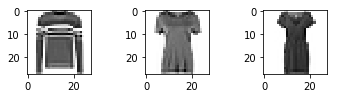

In [0]:

plt.subplot(331)
plt.imshow(X_trn[5], cmap='Greys')
plt.subplot(332)
plt.imshow(X_trn[10], cmap='Greys')
plt.subplot(333)
plt.imshow(X_trn[20], cmap='Greys')


 Tenemos el conjunto de prueba


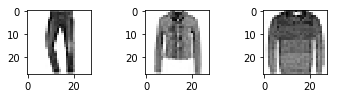

In [0]:
plt.subplot(334)
plt.imshow(X_tst[5], cmap='Greys')
plt.subplot(335)
plt.imshow(X_tst[10], cmap='Greys')
plt.subplot(336)
plt.imshow(X_tst[20], cmap='Greys')


## Parámetros


Se determina el número de neuronas en cada una de las capas de la red . En nuestro caso la red es muy sencilla y consta de tres capas, la capa de entrada (LI), la capa oculta (L1) y la capa de salida (L0).

In [0]:
LI = 784 
L1 = 128
LO = 10




## Entrada


In [0]:
def batch(X, Y, n):
    """Yield successive n-sized batch from X, Y."""
    for i in range(0, len(X), n):
        yield X[i:i+n], Y[i:i+n]


def rand_batch(X, Y, n):
  """Return random n-sized batch from X, Y."""
  idx = np.random.choice(len(X), n, replace=False)
  return X[idx], Y[idx]


msg = "I{:4d} loss trn: {:5.3f}, loss tst: {:5.3f}"


Se define la entrada de la red


In [0]:
# entrada
X = tf.placeholder(tf.float32, [None, 28, 28], name='X')
Y_true = tf.placeholder(tf.int32, [None], name='Y_true')
XR = tf.reshape(X, [-1, LI])
Y_true_1h = tf.one_hot(Y_true, 10, dtype=tf.float32)

#capas
Y1 = tf.layers.dense(XR, L1, activation=tf.nn.relu)
L = tf.layers.dense(Y1, LO)
Y0 = tf.nn.softmax(L)


#salida
Y_pred = tf.cast(tf.argmax(Y0, 1), dtype=tf.int32)
Y_pred_1h = tf.one_hot(Y_pred, 10, dtype=tf.float32)


#error
loss = tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y_true_1h, logits=L)
loss = tf.reduce_mean(loss, name='loss')


#optimizador
grad = tf.train.GradientDescentOptimizer(learning_rate=0.1)
opt = grad.minimize(loss)



with tf.Session() as sess:
      sess.run(tf.global_variables_initializer())

      for i, (X_t, Y_true_t) in enumerate(batch(X_trn, Y_trn, 64)):
        
        if not i % 10:
          X_evl, Y_evl = rand_batch(X_trn, Y_trn, 32)
          feed = {X: X_evl, Y_true: Y_evl}
          fetches = loss
          err_trn = sess.run(fetches, feed)
   
          
          X_evl, Y_evl = rand_batch(X_tst, Y_tst, 32)
          feed = {X: X_evl, Y_true: Y_evl}
          fetches = loss
          err_tst = sess.run(fetches, feed)
          print(msg.format(i, err_trn, err_tst))

        
        feed = {X: X_t, Y_true: Y_true_t}
        fetches = opt
        sess.run(fetches, feed)


W0814 21:59:37.340572 139729798113152 deprecation.py:323] From <ipython-input-16-506d15109172>:7: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.
W0814 21:59:37.344944 139729798113152 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


I   0 loss trn: 2.539, loss tst: 2.388
I  10 loss trn: 1.356, loss tst: 1.261
I  20 loss trn: 1.212, loss tst: 0.999
I  30 loss trn: 1.006, loss tst: 1.115
I  40 loss trn: 0.927, loss tst: 0.915
I  50 loss trn: 1.120, loss tst: 0.807
I  60 loss trn: 0.941, loss tst: 0.665
I  70 loss trn: 0.704, loss tst: 0.860
I  80 loss trn: 1.302, loss tst: 1.208
I  90 loss trn: 0.570, loss tst: 0.936
I 100 loss trn: 0.554, loss tst: 0.768
I 110 loss trn: 0.999, loss tst: 0.635
I 120 loss trn: 0.777, loss tst: 0.706
I 130 loss trn: 0.734, loss tst: 0.634
I 140 loss trn: 0.695, loss tst: 0.598
I 150 loss trn: 0.466, loss tst: 0.659
I 160 loss trn: 1.033, loss tst: 0.487
I 170 loss trn: 0.706, loss tst: 0.444
I 180 loss trn: 0.543, loss tst: 0.882
I 190 loss trn: 1.059, loss tst: 0.619
I 200 loss trn: 0.726, loss tst: 0.613
I 210 loss trn: 0.797, loss tst: 0.643
I 220 loss trn: 0.394, loss tst: 1.029
I 230 loss trn: 0.531, loss tst: 0.339
I 240 loss trn: 0.729, loss tst: 0.467
I 250 loss trn: 0.691, lo

>## Red neuronal convolucional: clasificación.

In [0]:
data = tf.keras.datasets.mnist.load_data()
  
(X_trn, Y_trn),(X_tst, Y_tst) = data
X_trn = X_trn / 255
X_tst = X_tst / 255
 

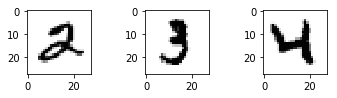

In [0]:

plt.subplot(331)
plt.imshow(X_trn[5], cmap='Greys')
plt.subplot(332)
plt.imshow(X_trn[10], cmap='Greys')
plt.subplot(333)
plt.imshow(X_trn[20], cmap='Greys')


In [0]:

X = tf.placeholder(tf.float32, [None, 28, 28], name='X')
Y_true = tf.placeholder(tf.int32, [None], name='Y_true')
XR = tf.reshape(X, [-1, 28, 28, 1])
Y_true_1h = tf.one_hot(Y_true, 10, dtype=tf.float32)


conv1 = tf.layers.conv2d(
      inputs= XR,
      filters=32,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)


pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

conv2 = tf.layers.conv2d(
      inputs=pool1,
      filters=64,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)
pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)


pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])
dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)
L = tf.layers.dense(inputs=pool2_flat, units=10)
S = tf.nn.softmax(L)

Y_pred = tf.cast(tf.argmax(S, 1), dtype=tf.int32)
Y_pred_1h = tf.one_hot(Y_pred, 10, dtype=tf.float32)


#error

loss = tf.nn.softmax_cross_entropy_with_logits_v2(
        labels=Y_true_1h, logits=L)
loss = tf.reduce_mean(loss, name='loss')


#optimizador
grad = tf.train.GradientDescentOptimizer(learning_rate=0.1)
opt = grad.minimize(loss)


with tf.Session() as sess:
      sess.run(tf.global_variables_initializer())

      for i, (X_t, Y_true_t) in enumerate(batch(X_trn, Y_trn, 64)):
        
        if not i % 10:
          X_evl, Y_evl = rand_batch(X_trn, Y_trn, 32)
          feed = {X: X_evl, Y_true: Y_evl}
          fetches = loss
          err_trn = sess.run(fetches, feed)
   
          
          X_evl, Y_evl = rand_batch(X_tst, Y_tst, 32)
          feed = {X: X_evl, Y_true: Y_evl}
          fetches = loss
          err_tst = sess.run(fetches, feed)
          print(msg.format(i, err_trn, err_tst))

        
        feed = {X: X_t, Y_true: Y_true_t}
        fetches = opt
        sess.run(fetches, feed)


I   0 loss trn: 2.296, loss tst: 2.297
I  10 loss trn: 1.952, loss tst: 2.043
I  20 loss trn: 1.866, loss tst: 1.829
I  30 loss trn: 1.176, loss tst: 1.276
I  40 loss trn: 0.759, loss tst: 1.061
I  50 loss trn: 0.830, loss tst: 0.843
I  60 loss trn: 0.750, loss tst: 0.200
I  70 loss trn: 0.147, loss tst: 0.315
I  80 loss trn: 0.257, loss tst: 0.290
I  90 loss trn: 0.343, loss tst: 0.188
I 100 loss trn: 0.889, loss tst: 0.247
I 110 loss trn: 0.232, loss tst: 0.518
I 120 loss trn: 0.202, loss tst: 0.330
I 130 loss trn: 0.369, loss tst: 0.192
I 140 loss trn: 0.144, loss tst: 0.273
I 150 loss trn: 0.209, loss tst: 0.134
I 160 loss trn: 0.133, loss tst: 0.586
I 170 loss trn: 0.142, loss tst: 0.102
I 180 loss trn: 0.165, loss tst: 0.181
I 190 loss trn: 0.084, loss tst: 0.146
I 200 loss trn: 0.063, loss tst: 0.099
I 210 loss trn: 0.179, loss tst: 0.075
I 220 loss trn: 0.087, loss tst: 0.065
I 230 loss trn: 0.054, loss tst: 0.155
I 240 loss trn: 0.108, loss tst: 0.083
I 250 loss trn: 0.093, lo